## preprocessing dataset for the Gender classification problem

### Visualize Random samples from the dataset

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def plot_random_images(folder_path, num_images_to_plot):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Filter only image files (you may want to add more image extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

    # Ensure the folder path ends with a separator '/'
    folder_path = folder_path if folder_path.endswith('/') else folder_path + '/'

    # Print the total number of images in the folder
    total_images = len(image_files)
    print(f"Total number of images in {folder_path}: {total_images}")

    # If there are fewer images than specified, plot all images
    num_images_to_plot = min(num_images_to_plot, total_images)

    # Display the specified number of random images
    random_images = random.sample(image_files, num_images_to_plot)
    fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))

    for i, image_file in enumerate(random_images):
        img_path = folder_path + image_file
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convert the image to float before displaying
        axes[i].imshow(img_rgb.astype(float) / 255)
        axes[i].axis('off')

    # Set the title of the entire plot to the total number of images
    fig.suptitle(f"Total number of images: {total_images}", fontsize=16)

    plt.show()

Total number of images in ./gender dataset/F/: 66


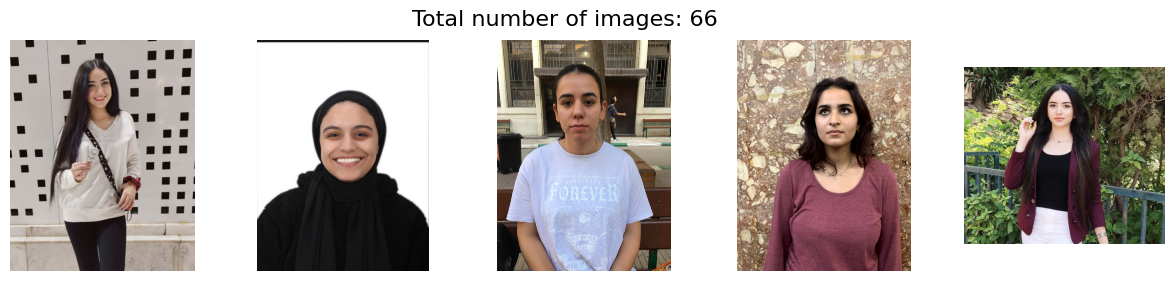

Total number of images in ./gender dataset/M/: 133


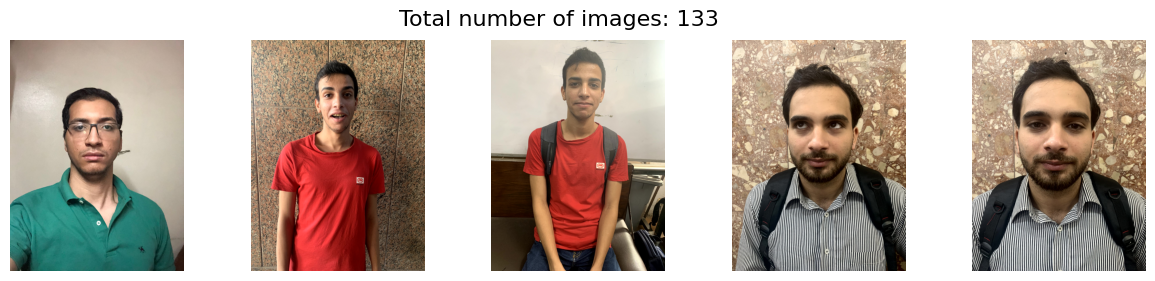

In [2]:
random_samples = 5 
F = "./gender dataset/F" 
M ="./gender dataset/M"
plot_random_images(F , random_samples)
plot_random_images(M , random_samples)

### Face Detection

In [3]:
import dlib
import cv2
import os

def detect_and_save_faces(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Initialize the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("./Utilities/shape_predictor_68_face_landmarks.dat")

    # Loop over the images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG')):
            image_path = os.path.join(input_folder, filename)

            # Read the image
            img = cv2.imread(image_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = detector(gray)

            # Loop over the faces and save the extracted faces
            for face in faces:
                landmarks = predictor(gray, face)
                
                # Draw a rectangle around the face
                cv2.rectangle(img, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

                # Save the extracted face without landmarks
                extracted_face = img[face.top():face.bottom(), face.left():face.right()]
                cv2.imwrite(os.path.join(output_folder, f"{filename}_face.jpg"), extracted_face)

    # Count the number of extracted faces
    num_faces = len(os.listdir(output_folder))
    print(f"Total number of extracted faces: {num_faces}")

In [4]:
input_folder = './gender dataset/F'
output_folder = './Preprocessed/Female'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 66


In [5]:
input_folder = './gender dataset/M'
output_folder = './Preprocessed/Male'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 133


### Resize the detected faces and Convert to Greyscale :)

In [6]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def resize_and_rename_images(folder_path, target_size):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Filter only image files (you may want to add more image extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

    # Ensure the folder path ends with a separator '/'
    folder_path = folder_path if folder_path.endswith('/') else folder_path + '/'

    # Loop through each image file
    for idx, image_file in enumerate(image_files, start=1):
        # Read the image
        img_path = folder_path + image_file
        img = cv2.imread(img_path)

        # Resize the image
        img_resized = cv2.resize(img, target_size)

        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        # Get the folder name as the prefix for renaming
        folder_name = os.path.basename(folder_path)
        new_name = f"{folder_name}{idx:02d}.jpg"  # Rename as FolderName01, FolderName02, ...

        # Save the resized and renamed image in grayscale
        cv2.imwrite(folder_path + new_name, img_gray)
        # Delete the original file
        os.remove(img_path)


In [7]:
folder_path = "./Preprocessed/Female/"  
target_size = (128, 128)  

resize_and_rename_images(folder_path, target_size)

In [8]:
folder_path = "./Preprocessed/Male/"  
target_size = (128, 128)  

resize_and_rename_images(folder_path, target_size)

Total number of images in ./Preprocessed/Female/: 66


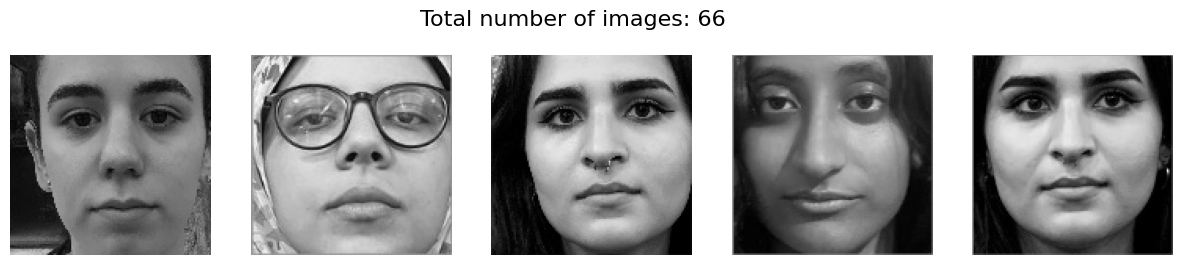

Total number of images in ./Preprocessed/Male/: 133


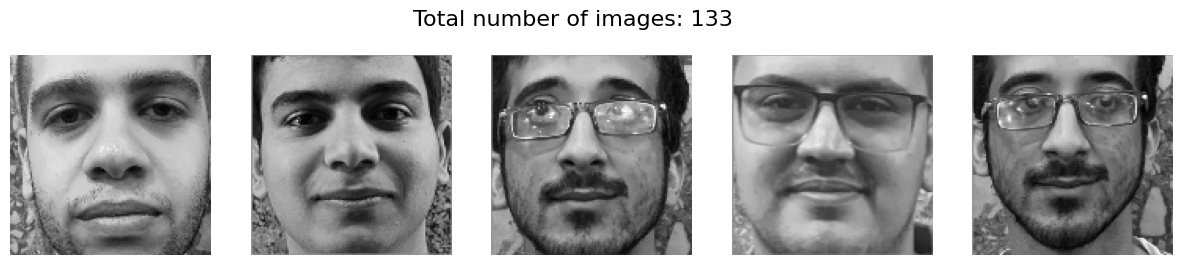

In [9]:
random_samples = 5 
F = "./Preprocessed/Female" 
M ="./Preprocessed/Male"
plot_random_images(F , random_samples)
plot_random_images(M , random_samples)

### AUGMENTATION o_O

In [10]:
import os
import cv2
import random

def augment_images(input_folder, output_folder, target_num_images):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # Check if there are enough images for augmentation
    if len(image_files) == 0:
        print("No images found in the input folder.")
        return

    # Calculate the number of augmentations needed per image
    augmentations_per_image = max(target_num_images // len(image_files), 1)

    # Keep augmenting until the desired number is reached
    augmented_images = []
    for i, image_file in enumerate(image_files):
        # Read the original image
        img = cv2.imread(os.path.join(input_folder, image_file))

        for j in range(augmentations_per_image):
            # Perform augmentations
            flipped_horizontally = cv2.flip(img, 1)
            flipped_hf = cv2.flip(flipped_horizontally, 1)
            # Rotate 30 degrees to the left
            rotation_matrix_left = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1)
            rotated_left = cv2.warpAffine(img, rotation_matrix_left, (img.shape[1], img.shape[0]))

            # Rotate 30 degrees to the right
            rotation_matrix_right = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), -30, 1)
            rotated_right = cv2.warpAffine(img, rotation_matrix_right, (img.shape[1], img.shape[0]))

            # Rotate 15 degrees to the left
            rotation_matrix_left_15 = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 15, 1)
            rotated_left_15 = cv2.warpAffine(img, rotation_matrix_left_15, (img.shape[1], img.shape[0]))

            # Rotate 15 degrees to the right
            rotation_matrix_right_15 = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), -15, 1)
            rotated_right_15 = cv2.warpAffine(img, rotation_matrix_right_15, (img.shape[1], img.shape[0]))


            # Add augmented images to the list
            augmented_images.extend([
                flipped_horizontally, flipped_hf,rotated_left,rotated_right,rotated_left_15,rotated_right_15
            ])

    # Randomly shuffle the augmented images
    #random.shuffle(augmented_images)

    # Save only the required number of images
    for i, augmented_image in enumerate(augmented_images[:target_num_images]):
        cv2.imwrite(os.path.join(output_folder, f"{i}_augmented.jpg"), augmented_image)

    print(f"{target_num_images} images requested, {len(augmented_images)} images augmented and saved to {output_folder}")


In [11]:
# FEMALES
input_folder = "./Preprocessed/Female/"
output_folder = "./Augmentation/Female"
target_num_images = 2500

augment_images(input_folder, output_folder, target_num_images)


2500 images requested, 14652 images augmented and saved to ./Augmentation/Female


In [12]:
# MALES
input_folder = "./Preprocessed/Male/"
output_folder = "./Augmentation/Male"
target_num_images = 2500

augment_images(input_folder, output_folder, target_num_images)



2500 images requested, 14364 images augmented and saved to ./Augmentation/Male


Total number of images in ./Augmentation/Female/: 2500


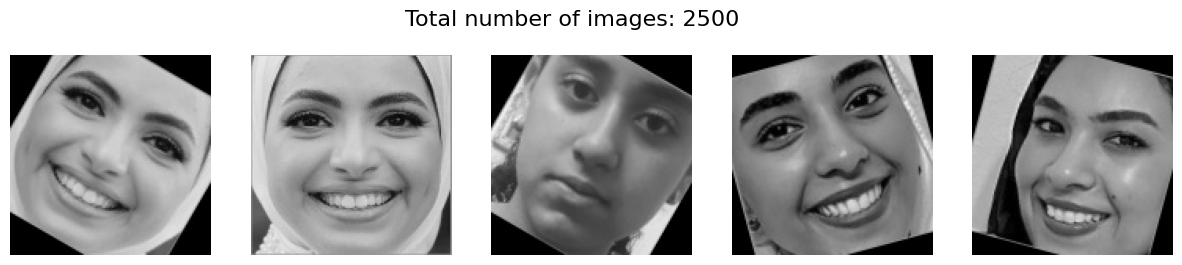

Total number of images in ./Augmentation/Male/: 2500


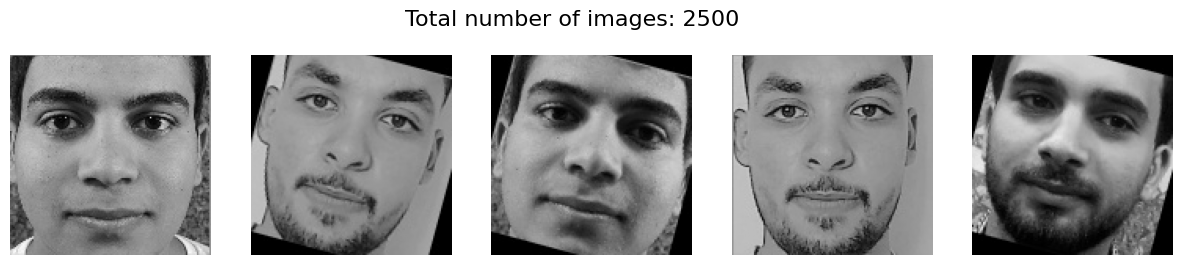

In [18]:
random_samples = 5 
F = "./Augmentation/Female" 
M ="./Augmentation/Male"
plot_random_images(F , random_samples)
plot_random_images(M , random_samples)